# DOWNLOAD DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p "/content/drive/MyDrive/GA/dataset"

In [ ]:
from google.colab import files
uploaded = files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset -p "/content/drive/MyDrive/HCMUT/ML242/GA/dataset"


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:06<00:00, 24.8MB/s]
100% 149M/149M [00:06<00:00, 23.7MB/s]


In [ ]:
!unzip "/content/drive/MyDrive/GA/dataset/brain-tumor-mri-dataset.zip" -d "/content/drive/MyDrive/HCMUT/ML242/GA/dataset/Original"


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/HCMUT/ML242/GA/dataset/Original/Training/glioma/Tr-gl_0712.jpg  
  inflating: /content/drive/MyDrive/HCMUT/ML242/GA/dataset/Original/Training/glioma/Tr-gl_0713.jpg  
  inflating: /content/drive/MyDrive/HCMUT/ML242/GA/dataset/Original/Training/glioma/Tr-gl_0714.jpg  
  inflating: /content/drive/MyDrive/HCMUT/ML242/GA/dataset/Original/Training/glioma/Tr-gl_0715.jpg  
  inflating: /content/drive/MyDrive/HCMUT/ML242/GA/dataset/Original/Training/glioma/Tr-gl_0716.jpg  
  inflating: /content/drive/MyDrive/HCMUT/ML242/GA/dataset/Original/Training/glioma/Tr-gl_0717.jpg  
  inflating: /content/drive/MyDrive/HCMUT/ML242/GA/dataset/Original/Training/glioma/Tr-gl_0718.jpg  
  inflating: /content/drive/MyDrive/HCMUT/ML242/GA/dataset/Original/Training/glioma/Tr-gl_0719.jpg  
  inflating: /content/drive/MyDrive/HCMUT/ML242/GA/dataset/Original/Training/glioma/Tr-gl_0720.jpg  
  inflating: /content/drive/MyDrive/HCMU

# EXPLORE


## Set up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cd /content/drive/MyDrive/HCMUT/ML242/GA

In [ ]:
import os

os.chdir('/content/drive/MyDrive/GA')

## Data Info

In [ ]:
class ImgReorganization:
    def __init__ (self, ds_root:str = 'dataset'):
        self.ds_root = ds_root
        self.ori_train_dir = f'{ds_root}/Original/Training'
        self.ori_test_dir = f'{ds_root}/Original/Testing'
        self.trainset_info = self.get_info_from(self.ori_train_dir)
        self.testset_info = self.get_info_from(self.ori_test_dir)

    def get_info_from(self, dir:str):
        if os.path.isdir(dir):
            info = {}
            class_count = 0
            for root,dirs,files in os.walk(dir):
                if len(dirs) > 0:
                    info['num_class'] = len(dirs)
                    info['class_names'] = dirs

                if len(files) > 0:
                        info[info['class_names'][class_count]] = len(files)
                        info[f"{info['class_names'][class_count]}_filenames"] = files
                        class_count += 1

            return info
        else:
            print(f"{dir} is not a directory.")
            return {}

In [ ]:
reg = ImgReorganization()

In [ ]:
print(reg.trainset_info)

{'num_class': 4, 'class_names': ['glioma', 'meningioma', 'notumor', 'pituitary'], 'glioma': 1321, 'glioma_filenames': ['Tr-gl_0199.jpg', 'Tr-gl_0431.jpg', 'Tr-gl_0177.jpg', 'Tr-gl_0750.jpg', 'Tr-gl_0725.jpg', 'Tr-gl_0433.jpg', 'Tr-gl_0171.jpg', 'Tr-gl_0494.jpg', 'Tr-gl_0370.jpg', 'Tr-gl_0453.jpg', 'Tr-gl_0279.jpg', 'Tr-gl_0324.jpg', 'Tr-gl_0286.jpg', 'Tr-gl_0338.jpg', 'Tr-gl_0588.jpg', 'Tr-gl_0143.jpg', 'Tr-gl_0681.jpg', 'Tr-gl_0219.jpg', 'Tr-gl_0300.jpg', 'Tr-gl_0709.jpg', 'Tr-gl_0365.jpg', 'Tr-gl_0242.jpg', 'Tr-gl_0535.jpg', 'Tr-gl_0629.jpg', 'Tr-gl_0239.jpg', 'Tr-gl_0250.jpg', 'Tr-gl_0595.jpg', 'Tr-gl_0495.jpg', 'Tr-gl_0485.jpg', 'Tr-gl_0284.jpg', 'Tr-gl_0554.jpg', 'Tr-gl_0516.jpg', 'Tr-gl_0548.jpg', 'Tr-gl_0243.jpg', 'Tr-gl_0447.jpg', 'Tr-gl_0384.jpg', 'Tr-gl_0251.jpg', 'Tr-gl_0627.jpg', 'Tr-gl_0419.jpg', 'Tr-gl_0675.jpg', 'Tr-gl_0533.jpg', 'Tr-gl_0344.jpg', 'Tr-gl_0685.jpg', 'Tr-gl_0598.jpg', 'Tr-gl_0174.jpg', 'Tr-gl_0672.jpg', 'Tr-gl_0593.jpg', 'Tr-gl_0459.jpg', 'Tr-gl_0463.jpg',

In [ ]:
reg.testset_info

{'num_class': 4,
 'class_names': ['glioma', 'meningioma', 'notumor', 'pituitary'],
 'glioma': 300,
 'glioma_filenames': ['Te-glTr_0001.jpg',
  'Te-glTr_0000.jpg',
  'Te-glTr_0005.jpg',
  'Te-glTr_0002.jpg',
  'Te-glTr_0003.jpg',
  'Te-glTr_0006.jpg',
  'Te-glTr_0004.jpg',
  'Te-gl_0117.jpg',
  'Te-gl_0200.jpg',
  'Te-gl_0172.jpg',
  'Te-gl_0247.jpg',
  'Te-gl_0094.jpg',
  'Te-gl_0052.jpg',
  'Te-gl_0293.jpg',
  'Te-gl_0283.jpg',
  'Te-gl_0122.jpg',
  'Te-gl_0129.jpg',
  'Te-gl_0134.jpg',
  'Te-gl_0271.jpg',
  'Te-gl_0268.jpg',
  'Te-gl_0162.jpg',
  'Te-gl_0145.jpg',
  'Te-gl_0166.jpg',
  'Te-gl_0215.jpg',
  'Te-gl_0125.jpg',
  'Te-gl_0071.jpg',
  'Te-gl_0170.jpg',
  'Te-gl_0236.jpg',
  'Te-gl_0057.jpg',
  'Te-gl_0017.jpg',
  'Te-gl_0123.jpg',
  'Te-gl_0024.jpg',
  'Te-gl_0263.jpg',
  'Te-gl_0127.jpg',
  'Te-gl_0241.jpg',
  'Te-gl_0050.jpg',
  'Te-gl_0290.jpg',
  'Te-gl_0056.jpg',
  'Te-gl_0139.jpg',
  'Te-gl_0059.jpg',
  'Te-gl_0015.jpg',
  'Te-gl_0292.jpg',
  'Te-gl_0285.jpg',
  'Te-g

In [ ]:
def check_info(dictionary:dict):
    for class_name in dictionary['class_names']:
        key = f'{class_name}_filenames'
        print(f"{dictionary[class_name]} = {len(dictionary[key])} --> {dictionary[class_name] == len(dictionary[key])}")

In [ ]:
import os
import re


def filter_different_name(dir:str):
    pattern = re.compile(r'^.{5}Tr.{5}\.jpg$')
    all_names = os.listdir(dir)
    matching_names = [name for name in all_names if pattern.match(name)]
    return matching_names

In [ ]:
names = filter_different_name('dataset/Original/Testing/notumor')
names

[]

In [ ]:
reg.trainset_info['class_names']

['glioma', 'meningioma', 'notumor', 'pituitary']

## Remake filename

In [ ]:
import os
import re


def remake_filename(root = f"dataset/Original"):
    ds = ['Training', 'Testing']
    class_names = reg.trainset_info['class_names']
    for sub_ds in ds:
        for c_name in class_names:
            dir = f"{root}/{sub_ds}/{c_name}"
            if not os.path.isdir(dir):
                print(f"{dir} is not a path")
                return
            else:
                print(dir)
            all_names = os.listdir(dir)
            pattern = re.compile(r'^(.{5})Tr(.{5}\.jpg)$')
            for name in all_names:
                matc = pattern.match(name)
                if matc:
                    new_name = matc.group(1) + matc.group(2)
                    old_path = os.path.join(dir, name)
                    new_path = os.path.join(dir, new_name)
                    os.rename(old_path, new_path)
                    print(f"Renamed {old_path} to {new_path}")
                    print("-----")

In [ ]:
remake_filename()

dataset/Original/Training/glioma
Renamed dataset/Original/Training/glioma/Tr-glTr_0001.jpg to dataset/Original/Training/glioma/Tr-gl_0001.jpg
-----
Renamed dataset/Original/Training/glioma/Tr-glTr_0004.jpg to dataset/Original/Training/glioma/Tr-gl_0004.jpg
-----
Renamed dataset/Original/Training/glioma/Tr-glTr_0008.jpg to dataset/Original/Training/glioma/Tr-gl_0008.jpg
-----
Renamed dataset/Original/Training/glioma/Tr-glTr_0003.jpg to dataset/Original/Training/glioma/Tr-gl_0003.jpg
-----
Renamed dataset/Original/Training/glioma/Tr-glTr_0002.jpg to dataset/Original/Training/glioma/Tr-gl_0002.jpg
-----
Renamed dataset/Original/Training/glioma/Tr-glTr_0007.jpg to dataset/Original/Training/glioma/Tr-gl_0007.jpg
-----
Renamed dataset/Original/Training/glioma/Tr-glTr_0006.jpg to dataset/Original/Training/glioma/Tr-gl_0006.jpg
-----
Renamed dataset/Original/Training/glioma/Tr-glTr_0005.jpg to dataset/Original/Training/glioma/Tr-gl_0005.jpg
-----
Renamed dataset/Original/Training/glioma/Tr-glT

In [ ]:
print(reg.trainset_info['glioma'])
print(reg.trainset_info['meningioma'])
print(reg.trainset_info['notumor'])
print(reg.trainset_info['pituitary'])
print('-----')
print(reg.testset_info['glioma'])
print(reg.testset_info['meningioma'])
print(reg.testset_info['notumor'])
print(reg.testset_info['pituitary'])

1321
1339
1595
1457
-----
300
306
405
300


In [ ]:
temp = 'Tr-gl_0000.jpg'
new_temp = temp.replace('-','_')
print(temp)
print(new_temp)

Tr-gl_0000.jpg
Tr_gl_0000.jpg


In [ ]:
def reformat_filename(root = f"dataset/Original"):
    ds = ['Training', 'Testing']
    class_names = reg.trainset_info['class_names']
    for sub_ds in ds:
        for c_name in class_names:
            count = 0
            dir = f"{root}/{sub_ds}/{c_name}"
            if not os.path.isdir(dir):
                print(f"{dir} is not a path")
                return
            else:
                print(dir)
            all_names = os.listdir(dir)
            for name in all_names:
                old_name = name
                new_name = name.replace('-','_')
                old_path = os.path.join(dir, name)
                new_path = os.path.join(dir, new_name)
                os.rename(old_path, new_path)
                print(f"Renamed {old_path} to {new_path}")
                count += 1

            print(f"==> Renamed {count} files in {dir}")
            print(f"-----")


In [ ]:
reformat_filename()

Streaming output truncated to the last 5000 lines.
Renamed dataset/Original/Training/meningioma/Tr-me_1187.jpg to dataset/Original/Training/meningioma/Tr_me_1187.jpg
Renamed dataset/Original/Training/meningioma/Tr-me_1059.jpg to dataset/Original/Training/meningioma/Tr_me_1059.jpg
Renamed dataset/Original/Training/meningioma/Tr-me_0914.jpg to dataset/Original/Training/meningioma/Tr_me_0914.jpg
Renamed dataset/Original/Training/meningioma/Tr-me_0883.jpg to dataset/Original/Training/meningioma/Tr_me_0883.jpg
Renamed dataset/Original/Training/meningioma/Tr-me_0986.jpg to dataset/Original/Training/meningioma/Tr_me_0986.jpg
Renamed dataset/Original/Training/meningioma/Tr-me_0977.jpg to dataset/Original/Training/meningioma/Tr_me_0977.jpg
Renamed dataset/Original/Training/meningioma/Tr-me_1070.jpg to dataset/Original/Training/meningioma/Tr_me_1070.jpg
Renamed dataset/Original/Training/meningioma/Tr-me_1199.jpg to dataset/Original/Training/meningioma/Tr_me_1199.jpg
Renamed dataset/Original/Trai

## Data Visualization

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_image(image_path: str):
    if not isinstance(image_path, str):
        raise ValueError("The image path must be a string.")

    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"No file found at: {image_path}")

    img = mpimg.imread(image_path)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

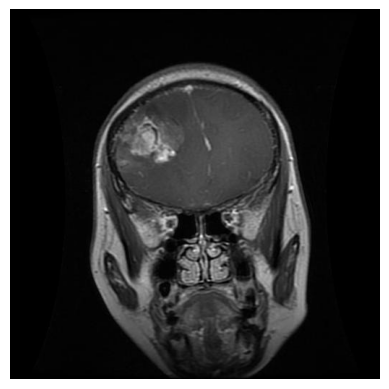

In [ ]:
ori_train_dir = reg.ori_train_dir
plot_image(f"{ori_train_dir}/glioma/Tr-gl_0000.jpg")

In [ ]:
from PIL import Image
import os

def get_image_size(image_path: str):
    if not isinstance(image_path, str):
        raise ValueError("The image path must be a string.")

    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"No file found at: {image_path}")

    with Image.open(image_path) as img:
        return img.size